<a href="https://colab.research.google.com/github/mi55a/fermiStuff/blob/main/RegressionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial as poly
# libraries needed for the program

# Regression and Classification

Original Course by: [Matthew R. Carbone](https://www.bnl.gov/staff/mcarbone) | _Assistant Computational Scientist, Computational Science Initiative, Brookhaven National Laboratory_

Revisions by: Maggie Voetberg, (Has no fancy website.) | _AI Researcher, Fermi National Accelelator Laboratory_

In this tutorial, we're going to go over the fundamentals of regression and classification, which are the two most common types of supervised learning. We will also discuss some of the best practices in machine learning, such as a train-validation-testing split. In regression problems, the objective is to learn a _continuous_ output. In classification problems, the objective is to learn a _discrete_ output. Here are some examples:
- Predicting the cost of a house from its properties, such as square footage, number of bathrooms, etc. is a _regression_ problem.
- Whether or not an image is of a cat or dog is a _classification_ problem.
- Predicting the type of animal in an image is a _classification_ problem.

**Learning objectives:**

In this lesson you will learn:
* What a loss function is, and how you define it
* How to optimize a function with gradient descent
* How different types of models can be optimized to predict values


## Ingredients for regression

There are a few "ingredients" to always consider when approaching a regression problem.
- Your available data ("dataset")
- Your choice of model ("model")
- How you choose to fit the model to the data ("optimizer")
- An indicator for how well your model fits the data ("loss function"/"criterion")

We will discuss all of these components today.

## Other resources

- [Andrew Ng's flagship Coursera course on machine learning](https://www.coursera.org/specializations/machine-learning-introduction)
- [Intro to regression analysis](https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3)
- [15 types of regression](https://www.listendata.com/2018/03/regression-analysis.html#Linear-Regression)
- [Gradient descent tutorial](https://machinelearningmind.com/2019/10/06/gradient-descent-introduction-and-implementation-in-python/)
- [Linear regression gradient descent tutorial](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)
- [Logistic regression tutorial](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
- [Another logistic regression tutorial](https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial)
- [Decision Tree Overview](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/)
- [Google's excellent Decision Forest Developers](https://developers.google.com/machine-learning/decision-forests/decision-trees)

# Linear regression and gradient descent

Let's begin with the simplest form of regression: that of fitting a line to data. We can recast this problem as learning the familiar $f(x) = mx + b.$ Given a dataset $\{x_i, y_i\}$, we can "learn" the coefficients $m$ and $b$ that best model the data, exactly how you would have learned to fit the slope and intercept of a line back in algebra.

In [ ]:
def linear_model(x, m, b):
    return m * x + b # Function of y=m*x+b

In [ ]:
def linear_data_with_noise(seed=123, scale=0.5, N=100, slope=2.5, y_intercept=0.8):
    """_summary_

    Args:
        seed (int, optional): Random Seed. Defaults to 123.
        scale (float, optional): Noise scaling factor. Defaults to 0.5.
        N (int, optional): Number of samples. Defaults to 100.
        slope (float, optional): The "M" of y=mx+b. Defaults to 2.5.
        y_intercept (float, optional): The "B" for y=mx+b. Defaults to 0.8.

    Returns:
        tuple(np.ndarray, np.ndarray): X and Y arrays
    """

    np.random.seed(seed) # Can make sure you get the same random result each time
    # Important for processes like this, were noise is important

    x = np.linspace(-1, 1, N)
    random_noise = np.random.normal(scale=scale, size=(N,))
    y = linear_model(x, slope, y_intercept) + random_noise # Use the function above
    return x, y

In [ ]:
x, y = linear_data_with_noise()
# parameters inside function

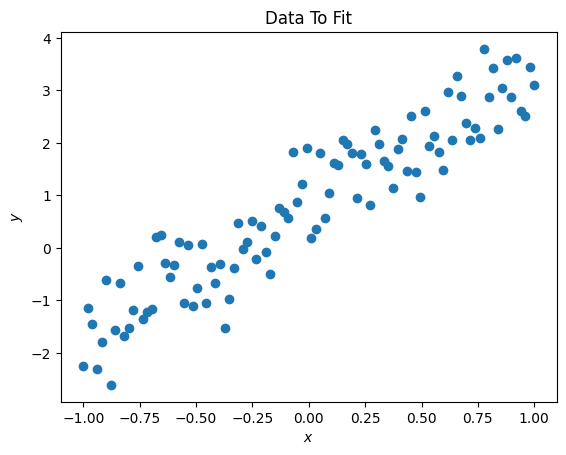

In [ ]:
plt.scatter(x, y)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.title("Data To Fit")
plt.show()

Suppose we fix $m$ and $b$ to some values $m_0$ and $b_0$. We now have a model which is completely defined, and given some value for $x$, we can predict $y.$ But how do we know if these are good choices? We need to define a metric, or a measure of how well the model fits the data.

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Above, our `criterion` is called the average mean squared error (MSE). The square root of this is the "root-mean-squared" error, which you are likely familiar with. There are many ways to choose which criterion you want to use, but for now the MSE will suffice. In machine learning lingo, it's called a "hyper parameter" (which we can discuss more later).

Often, when you see MSE written out in mathematical synatax, you'll see:
$$
L = \frac{\sum (y - \hat{y})^2}{|y|}
$$

$y$ denotes the true values, and $\hat{y}$ denotes the values output by some predictive method. Sometimes it's also written as $y_{true}$ and $y_{pred}$.

# Evaluate a guess for $m$ and $b$

For the above example, write your guesses for the value of $m$ and $b$, we'll use this to write a "fit". Afterwards, we can use this fit to make some predictions about future values of the line, and evaluate how good they are in comparision to our existing examples of the line!

In [ ]:
m_guess = 3
b_guess = 1

y_pred = linear_model(x, m_guess, b_guess)

Now that we have a prediction, let's test it with our `criterion`.

In [ ]:
prediction_mse = mean_squared_error(y_true=y, y_pred=y_pred)
prediction_mse

2.816488747778184

We can also visualize those results! See how close you are.

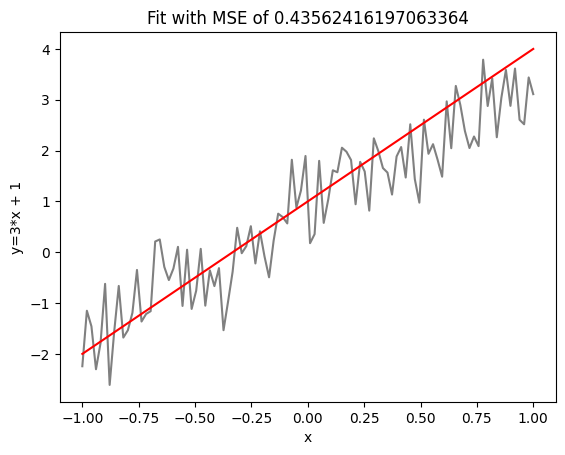

In [ ]:
plt.plot(x, y, label="True Values", color="grey")
plt.plot(x, y_pred, label="Predicted Values", color="red")

plt.ylabel(f"y={m_guess}*x + {b_guess}")
plt.xlabel(f"x")
plt.title(f"Fit with MSE of {prediction_mse}")
plt.show()

## A smarter optimizer: gradient descent

It stands to reason that just randomly guessing parameters is probably not the most effective way of finding the right guess. Can we do better? Absolutely! [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), and its family of related methods (you may have heard of [Adam](https://arxiv.org/abs/1412.6980)), can be used to find an optimal set of parameters for arbitrary models.

Gradient descent, and its related methods, are all about finding the optima of functions. For example, if I give you a function $f(x) = (x-2)^2$ and ask you to find its minimum, how would you do this. From calculus, you might know how. You also might recognize this is a simple parabola and know the answer right away. But what about some arbitrary function, possibly with many _local_ minima, and possibly a _huge_ number of parameters (in machine learning, this number can easily be greater than $10^7$)? Gradient descent is a method for finding minima numerically.

Given a function $f(x)$ and its derivative $\nabla f(x),$ the general rule of gradient descent is that to find a point closer to the actual minimum of $f,$ we follow its gradient:

$$x_{n+1} = x_n - \gamma \nabla f(x_n).$$

This is perhaps easiest to see through an example. Let's consider the function $f(x) = (x-2)^2,$ and its derivative $\frac{df(x)}{dx} = \nabla f(x) = 2(x-2).$

### Side Note: Gradients and Derivative

Confusingly, the words "gradients" ($\nabla f(x)$) and "derivative" ($\frac{df(x)}{dx}$) are used interchangably sometimes. For our single variable function, $f(x) = (x-2)^2$, they are the same. However, if we had a function of multiple variables (as we almost always do in ML/AI), this wouldn't be the case. For example, if we had a function $f(x,y,z) = x+y+z$, the derviative $\frac{df(x,y,z)}{dx}$ is only depending on $x$, so we wouldn't have derviative information about the other variables (y, z). We could very easily optimize a function to get to a minimum for x, but the other variables would be out in the cold. This is were the vector form of the derviative, the gradient comes in. The gradient takes the deriative of all these variables at once.

So for our example $f(x,y,z) = x+y+z$,

$$
\frac{df(x, y, z)}{dx} = 1+y+z
$$
$$
\nabla f(x, y, z) = <\frac{df(x, y, z)}{dx}, \frac{df(x, y, z)}{dy}, \frac{df(x, y, z)}{dz}> = <1+y+z, x+1+z, x+y+1>
$$

In [ ]:
def gradient_descent(x0, gamma, f_prime, N=100):
    """The gradient descent algorithm for a single dimention.

    Parameters
    ----------
    x0 : float
        The initial guess for the minimum.
    gamma : float
        Learning rate.
    N : int
        Number of iterations.

    Returns
    -------
    list
        A list of the values of x found during gradient descent.
    """

    guesses = [x0]
    for _ in range(N):
        current_guess = guesses[-1]
        f_prime_step = f_prime(current_guess)
        step_size = gamma * f_prime_step
        new_guess = current_guess - step_size

        guesses.append(new_guess)
    return guesses

In [ ]:
def f_prime(x):
    return 2.0 * (x - 2.0)

points = np.array(gradient_descent(
    x0=10.0,
    gamma=0.1,
    f_prime= f_prime,
    N=100
))

Lets plot how well the `gradient_descent` function finds this minimum.

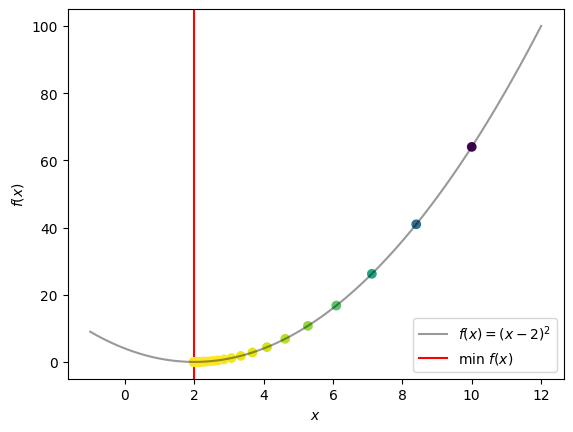

In [ ]:
xgrid = np.linspace(-1, 12, 100)

plt.plot(xgrid, (xgrid - 2.0)**2, "k-", label=r"$f(x)=(x-2)^2$", alpha=0.4)
plt.scatter(points, (points - 2.0)**2, c=-(points - 2.0)**2)
plt.axvline(2.0, zorder=-1, color="red", label="min $f(x)$")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

## ⚠️ Check your understanding

Play around with the above code a bit. Here are some examples of things you can try.
- What happens if you make $\gamma$ really large?
- What happens if you make $\gamma$ really small?
- What happens if you change $x_0$?

Use the below code to try finding the mininum of another function!
- What happens if you change the function? For example, try $f(x) = \sin x$ (remember the derivative?)
- How would you update this code to account for more than one parameter in the model? (Maybe something like $f(\vec{x}) = sin(x_1) + 2sin(x_2)$?)

In [ ]:
def new_f_prime(x):
    return np.cos(x)

optimized_points = np.array(gradient_descent(
    x0=3.14,
    gamma=0.01, # 𝛾 symbol
    f_prime=new_f_prime,
    N=300
))

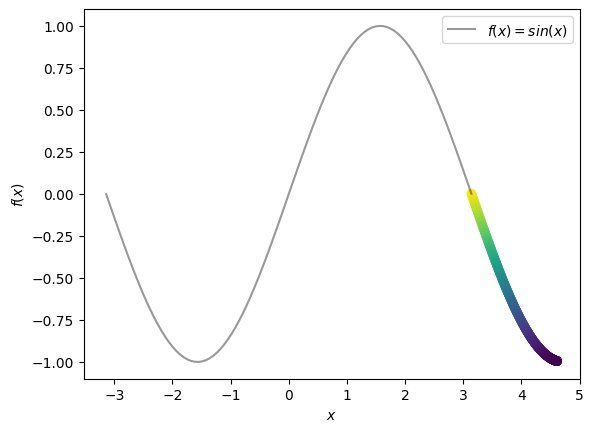

In [ ]:
xgrid = np.linspace(-3.14, 3.14, 100) # -pi to pi

points_true = np.sin(xgrid)
minimizing_history = np.sin(optimized_points)

plt.plot(xgrid, points_true, "k-", label=r"$f(x)=sin(x)$", alpha=0.4)
plt.scatter(optimized_points, minimizing_history, c=minimizing_history)


plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()
# The rainbow trail goes further to the right as you increase the number, while further to the left when you give it a lower item, or x0

## Optimizing a loss function

Now we put two pieces together. The loss function is a measure of how different two sets of data points is. To make a good model, we want to minimize the loss function (so the output of the model will be as close to the training data as we can get it).

So, to measure the loss of the linear model, we combine the equations:  $ \hat{y} = m*x+b $, $ L = \frac{\sum (y - \hat{y})^2}{|y|} $.


$$ f(m,b)|_{x,y} = \frac{\sum (y - (m*x+b))^2}{|y|} $$


So this is now the equation we can apply gradient descent optimization on. Only thing to be concerned about is making sure that our $f(m,b)$ is linearly differentiable. (So we can find $\nabla f(m,b)$).

Luckily! It is!

In [ ]:
def gradient_descent_linear_model(x:np.array, y:np.array, m0:float, b0:float, gamma:float=0.1, N:int=100):
    """
    Preform gradient descent for a 1D linear model

    Args:
        x (np.array): _description_
        y (np.array): _description_
        m0 (float): _description_
        b0 (float): _description_
        gamma (float, optional): _description_. Defaults to 0.1.
        N (int, optional): _description_. Defaults to 100.

    Returns:
        tuple(list, list) : M and B values
    """

    b = [b0]
    m = [m0]

    for _ in range(N):

        current_m = m[-1]
        current_b = b[-1]

        y_pred = linear_model(x, current_m, current_b) # How do we get the prediction?

        # Calculate the derivatives of the loss function at x and y, y_pred
        m_derviative = -2.0 / len(x) * np.sum(x * (y - y_pred))
        b_derviative = -2.0 / len(x) * np.sum(y - y_pred)

        # step_size = gamma * f_prime_step where we are movinh
        # new_guess = current_guess = step_size

        new_m_guess =  current_m - gamma * m_derviative
        new_b_guess = current_b - gamma * b_derviative

        # Update
        m.append(new_m_guess)
        b.append(new_b_guess)

    return m, b

In [ ]:
m, b = gradient_descent_linear_model(x, y, m0=-1.9, b0=-5.0, gamma=0.1, N=100)

If we plot the convergence of `m` and `b` as a function of "epoch" (or number of full passes through the training data) we can see that the data very quickly settles on a final pair of parameters.

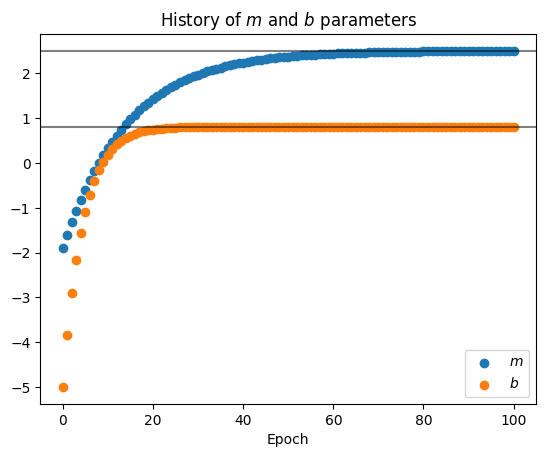

In [ ]:
epochs = range(len(m))

plt.axhline(m[-1], color="black", alpha=0.5) # Final m value, x[-1] is the last value in the list x.
plt.axhline(b[-1], color="black", alpha=0.5)

plt.scatter(epochs, m, label="$m$")
plt.scatter(epochs, b, label="$b$")

plt.legend()
plt.xlabel("Epoch")
plt.title("History of $m$ and $b$ parameters")
plt.show()

We can also look at the linear fit itself at a few different steps.

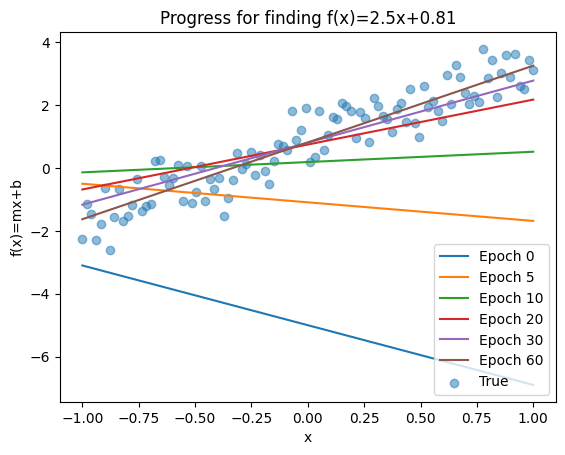

In [ ]:
# Looking at the above plot, let's see the fit at epochs 0, 5, 10, 20, 30, 60

epochs = [0, 5, 10, 20, 30, 60]
for epoch_check in epochs:
    m_guess, b_guess = m[epoch_check], b[epoch_check]
    y_pred = linear_model(x, m_guess, b_guess)

    plt.plot(x, y_pred, label=f"Epoch {epoch_check}")

plt.scatter(x, y, label='True', alpha=0.5)
plt.xlabel("x")
plt.ylabel("f(x)=mx+b")
plt.title(f"Progress for finding f(x)={round(m[-1],2)}x+{round(b[-1],2)}")
plt.legend()
plt.show()

This is pretty unwieldly way to look at our progress, so we can make something called "A Loss Curve". This gives one number for the whole model, so we have one point per epoch.

Generally speaking, in ML we have a lot of parameters to track, so instead of storing every single model in our training process, we just keep track of this loss instead as a proxy for model performance.

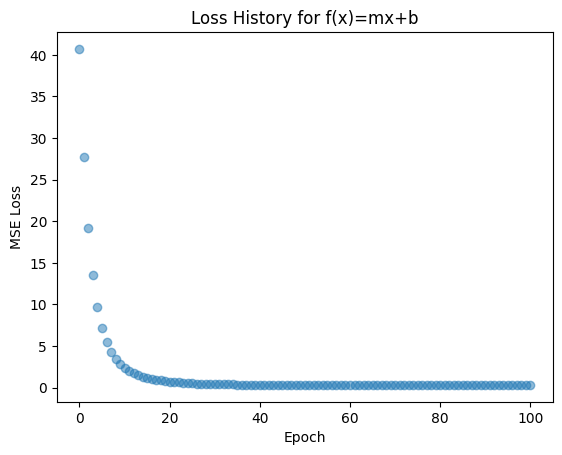

In [ ]:
loss_history = []
for m_guess, b_guess in zip(m, b):
    y_pred = linear_model(x, m_guess, b_guess)
    loss = mean_squared_error(y, y_pred)
    loss_history.append(loss)

epoch = range(len(loss_history))
plt.scatter(epoch, loss_history, alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss History for f(x)=mx+b")
plt.show()

Learning rate ($\gamma$) plays a very important role in model, training.
To make sure models train well, we need to make sure we get a learning rate that isn't too high or too low.
Too high, and the model weights may "skip" over the solution.
Too low, and they may never get there.

Below is an example were we set the learning rate REALLY low.
Before you run it, try to guess what the loss curve is going to look like.

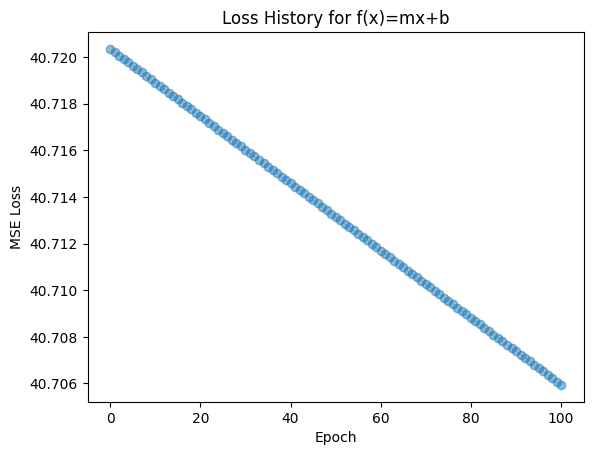

In [ ]:
m, b = gradient_descent_linear_model(x, y, m0=-1.9, b0=-5.0, gamma=0.000001, N=100)

loss_history = []
for m_guess, b_guess in zip(m, b):
    y_pred = linear_model(x, m_guess, b_guess)
    loss = mean_squared_error(y, y_pred)
    loss_history.append(loss)

epoch = range(len(loss_history))
plt.scatter(epoch, loss_history, alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss History for f(x)=mx+b")
plt.show()

## Challenge: Prevent the model from converging

There are a few different things that cause models to fail to learn. Sometimes it is due to the model itself, but other times it has to do with the model `hyperparameters`. In the case of our model, the hyperparameters are:
* Initial Guesses for Model Coefficents ($m_0$, $b_0$)
* Learning Rate ($\gamma$)
* Number of Epochs (`N`)

Try to change these hyperparameters around until the model fails to converage to a small loss. What changes things the most?

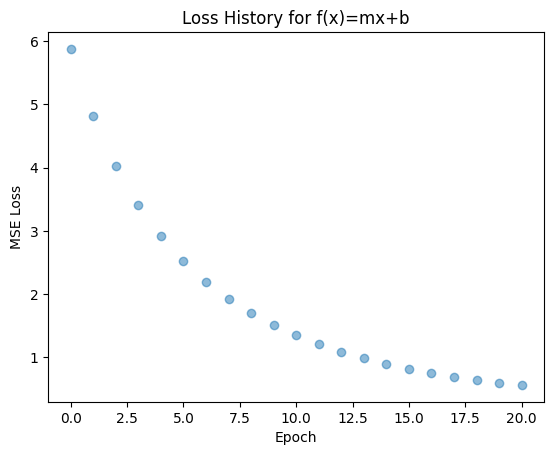

In [ ]:
m0 = 6
b0 = 2
gamma = 0.1
n_epochs = 20

m, b = gradient_descent_linear_model(x, y, m0=m0, b0=b0, gamma=gamma, N=n_epochs)

loss_history = []
for m_guess, b_guess in zip(m, b):
    y_pred = linear_model(x, m_guess, b_guess)
    loss = mean_squared_error(y, y_pred)
    loss_history.append(loss)

epoch = range(len(loss_history))
plt.scatter(epoch, loss_history, alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss History for f(x)=mx+b")
plt.show()

## Polynominal Fits, Underfitting, and Overfitting

This sample principcal for optimization can be applied to anything you can take a derivative of. (This includes complicated neural network archectures! Basically all ML is just increasing complicated linear algebra!)

So instead of fitting a simple line of data, let's try a more complicated data structure, so we can optimize a polynominal to fit.

In [ ]:
rng = np.random.default_rng(seed=41)

n_coeff = rng.integers(4,9) # Anywhere between 4 and 9 polynominal coefficents
poly_coefficents = [rng.random() for _ in range(n_coeff)]
polynominal = poly.polynomial.Polynomial(poly_coefficents) # Random coefficents, we don't know what the polynominal we're fitting is (unless we look ;))
x, y = polynominal.linspace(n=100, domain=[-5, 5])

y += rng.uniform(-3, 3, 100)

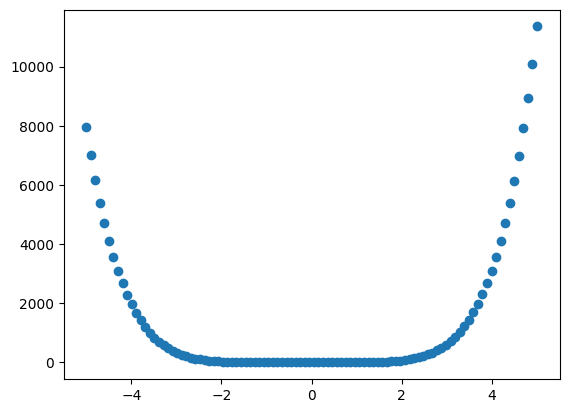

In [ ]:
plt.scatter(x,y)

## Guess a number of parameters, and optimize

`Np.Polynominal` has a least square fit included, so we can use this a shortcut instead of writing a whole new gradient descent method. Though, remember, as long as you _can_ take a deriative, you can try to optimize this model via gradient descent!

In [ ]:
# coefficent guess

# This looks almost like a parabola, so let's try a 2nd degree polynominal for a fit
degree_of_fit = 2
new_model = poly.polynomial.Polynomial([1 for _ in range(degree_of_fit+1)]) # You can play around with these to try and get a good initial fit!
model_fit = new_model.fit(x, y, deg=2)
x_fit, y_fit = model_fit.linspace(n=100, domain=[-5, 5]) # Get points over the same space, see the loss!

In [ ]:
mean_squared_error(y, y_fit)

1239521.2715179906

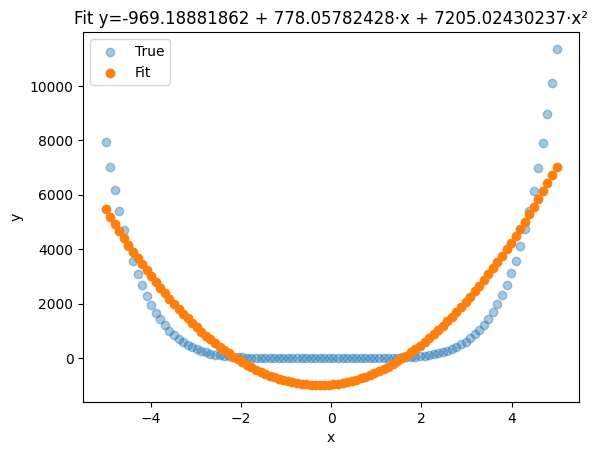

In [ ]:
plt.scatter(x, y, alpha=0.4, label='True')
plt.scatter(x_fit, y_fit, label='Fit')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Fit y={model_fit}")
plt.show()

This isn't a bad fit, strictly speaking, but it's not great. We can probably call this model `underfit` (as we have more complexity in the data than the model predicts.) Look at how the tail of the model, (around x=-4) behaves as compared to the data - there is a mis-match.

Model underfitting can be caused by many things but the two that are easiest to correct are:

* Model does not have enough parameters to fit the data

If your model is too simple for your data, it'll be hard to show good results. Imagine trying to draw a line of best fit through a sine function - you'll never get perfectly accurate results.

* Model hasn't been trained long enough.

This is like if we stopped training the linear model at epoch 10. There is still a lot of extra work the model can do, it hasn't converged on a solution. This can be tricker to see when you get more complicated data and more complicated models, but keeping a second set (called a `validation` set) which is only used for testing can help. When the training data doesn't improve beyond the validation data, that indicates there may be a problem.



In the above example, we know for a fact the model is unfit with too few parameters, as we tried to fit a polynominal that is at least degree 4 with a degree 2 model. Let's try again with a more complicated model.

In [ ]:
degree_of_fit = 16
new_model = poly.polynomial.Polynomial([1 for _ in range(degree_of_fit+1)])
model_fit = new_model.fit(x, y, deg=degree_of_fit)
x_fit, y_fit = model_fit.linspace(n=100, domain=[-5, 5])

mean_squared_error(y, y_fit)

2.816488747778184

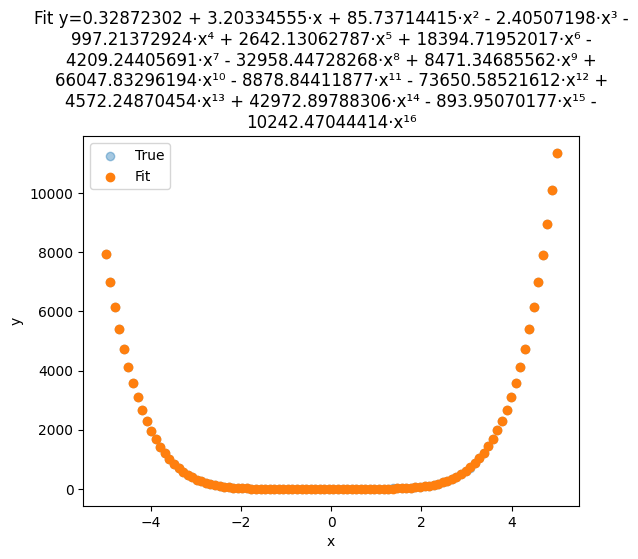

In [ ]:
plt.scatter(x, y, alpha=0.4, label='True')
plt.scatter(x_fit, y_fit, label='Fit')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Fit y={model_fit}")
plt.show()

Wow! Loss here is a lot better.

We have a different problem here though, one's that a bit more subtle. It's easier to see this when we check the truth value of the source polynominal against our predictions.

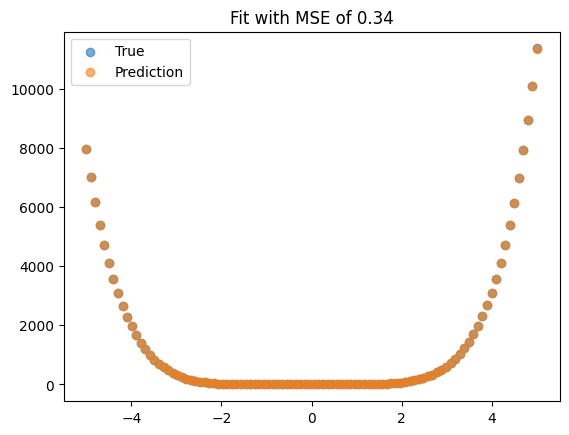

In [ ]:
_, y_true = polynominal.linspace(n=100, domain=[-5, 5])
x, y_pred = model_fit.linspace(n=100, domain=[-5, 5])

plt.scatter(x, y_true, label="True", alpha=0.6)
plt.scatter(x, y_pred, label="Prediction", alpha=0.6)

plt.title(f"Fit with MSE of {round(mean_squared_error(y_true, y_pred), 2)}")
plt.legend()
plt.show()

# If our model was truly good, it would be a nearly perfect fit when noise is removed. Instead, we fit to the noise.

In [ ]:
# Challenge: Make the nearly perfect model

degree_of_fit = 5

new_model = poly.polynomial.Polynomial([1 for _ in range(degree_of_fit+1)])
new_model = new_model.fit(x, y, deg=degree_of_fit)
x_fit, y_fit = new_model.linspace(n=100, domain=[-5, 5])

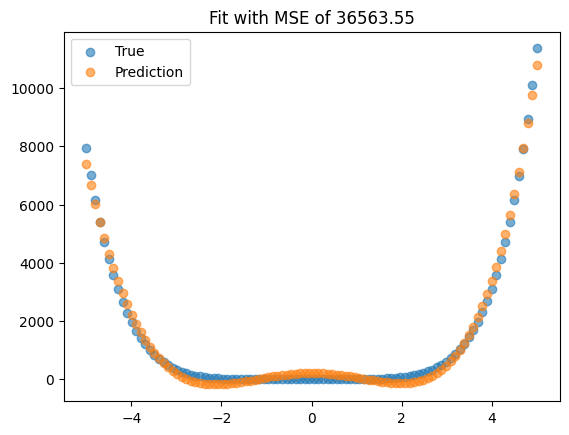

In [ ]:
_, y_true = polynominal.linspace(n=100, domain=[-5, 5])

plt.scatter(x, y_true, label="True", alpha=0.6)
plt.scatter(x, y_fit, label="Prediction", alpha=0.6)

plt.title(f"Fit with MSE of {round(mean_squared_error(y_true, y_fit), 2)}")
plt.legend()
plt.show()

# Logistic Regression

Logistic regression is a slight modification of linear regression that allows for categorical targets. There are multiple types of logistic regression, but for this tutorial, we will focus on _binary_ logistic regression: when the target value can be "on or off": 0 or 1.

Consider the previous linear regression model of a single variable: $f(x) = mx + b$. The range, or set of possible values, that $f(x)$ can take on is infinite: $f(x) \in (-\infty, \infty).$ This is appropriate, in general, for regression problems in which the output can take on any value, but in classification problems, we want the model to essentially represent the probability of being one of the two classes.

So, for logistic regresion, we add an extra step:

$$g(x) = \sigma(f(x))$$

where

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

is called the _sigmoid function_. The sigmoid function has the property of being bounded between 0 and 1, making it a convenient choice for our purposes.

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

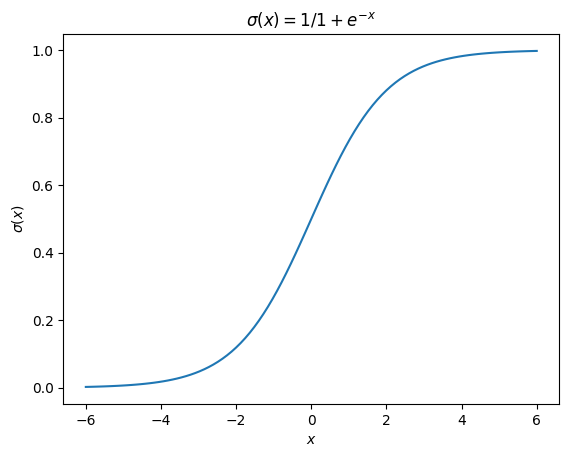

In [ ]:
grid = np.linspace(-6, 6, 100)
plt.plot(grid, sigmoid(grid))
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")
plt.title("$\sigma(x) = 1/{1 + e^{-x}}$")
plt.show()

## ⚠️ Check your understanding

The output of $\sigma(x)$ is of course continuous. How can we get a discrete output from this?

In [ ]:
def get_discrete_prediction(x):
    sigmoid_model_output = sigmoid(x)
    cutoff_point = 0.5
    if sigmoid_model_output > cutoff_point:
        return 1
    else:
        return 0


In [ ]:
assert get_discrete_prediction(-2) == 0
assert get_discrete_prediction(9) == 1

## New dataset - Kinematics!

Let's imagine a strange situation.

Suppose you are at NASA mission control, and you have astronauts on Mars and the Moon at the same time. How incredible! To make sure your instruments are callibrated correcrtly, you asked your astronauts to load a few baseballs in their space travel sized pitching machine, and track them as a function of time, sending the results back to you. They include the velocity and position as a function of time for you to make sure your instruments are calculating gravity correctly.

 Unfortunately, you now have two signals being sent back from both astral bodies, but you forgot tell them what channels to use! You now have to write an algorithm to differenciate the two. You know you can do it, but you made a bet with your colleage that you could do it without using physics equations. This may be silly on your part, but you're fairly certain it'll work out.

 But just in case it doesn't, your colleage already has the anwsers.

In [ ]:
rng = np.random.default_rng(seed=42)

def kinematics(time, gravity):
    init_throw_velo = ((25-10) * rng.random() + 10) * np.sin(np.pi/4)
    position = init_throw_velo * time  - 0.5 * gravity * time**2
    velocity = init_throw_velo**2 - 2*gravity*position
    return position, velocity

def moon_call(time):
    gravity = 1.625
    position, velocity = kinematics(time, gravity)
    return np.array([time, position, velocity])

def mars_call(time):
    gravity = 3.721
    position, velocity = kinematics(time, gravity)
    return np.array([time, position, velocity])

def space_signal(N_pings=3600):
    signal = np.array([0,0,0])
    source = np.array([])
    for _ in range(N_pings):
        time = 5 * rng.random() # between 0 and 5 seconds
        signal_source = 0 if rng.random()<0.5 else 1
        if signal_source == 0:
            new_signal = moon_call(time)
        else:
            new_signal = mars_call(time)

        signal = np.vstack([signal, new_signal])
        source = np.concatenate([source, np.array([signal_source])])
    signal = signal[1:,]
    return signal, source

In [ ]:
signal, source = space_signal()
# What we want to predict is if each sample was taken on the moon or on mars,
#so the labels here is the location it was sent from (source=(0,1)), and the signal is the time, position, velocity tuple

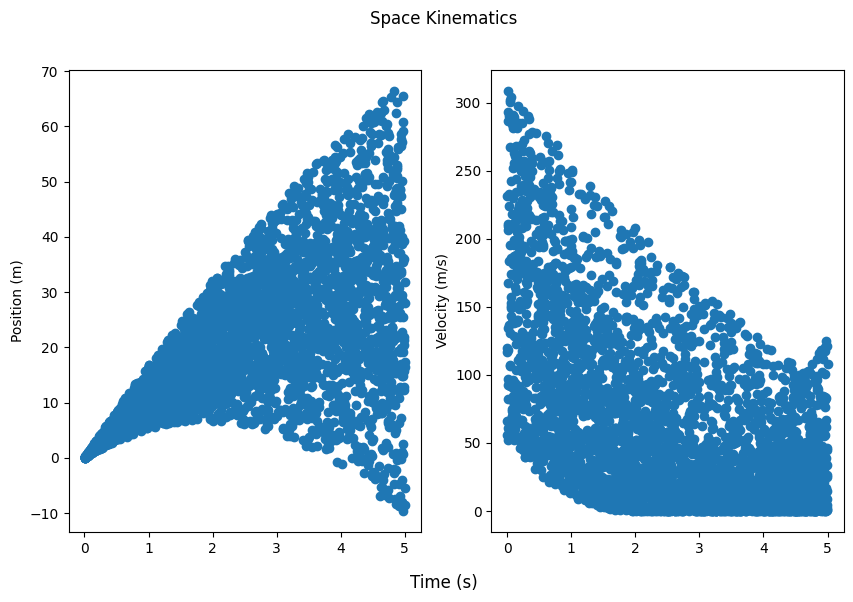

In [ ]:
## Quick visualization
fig, subplots = plt.subplots(1, 2, figsize=(10,6))

subplots[0].scatter(signal[:,0], signal[:,1])
subplots[0].set_ylabel("Position (m)")

subplots[1].scatter(signal[:,0], signal[:,2])
subplots[1].set_ylabel("Velocity (m/s)")

fig.suptitle("Space Kinematics")
fig.supxlabel("Time (s)")
plt.show()

# Scaling

If you look at those plots above, those are pretty different scales for each of the variables. Because of this, the model will struggle to optimize the variables - putting more weight on the bigger variables and less weight on the smaller variables, when there is a lot more complexity there.

We can use scikit-learn's [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this - as we only have to do it once, and then can use the scaler for other predictions down the road.

(3600, 3)


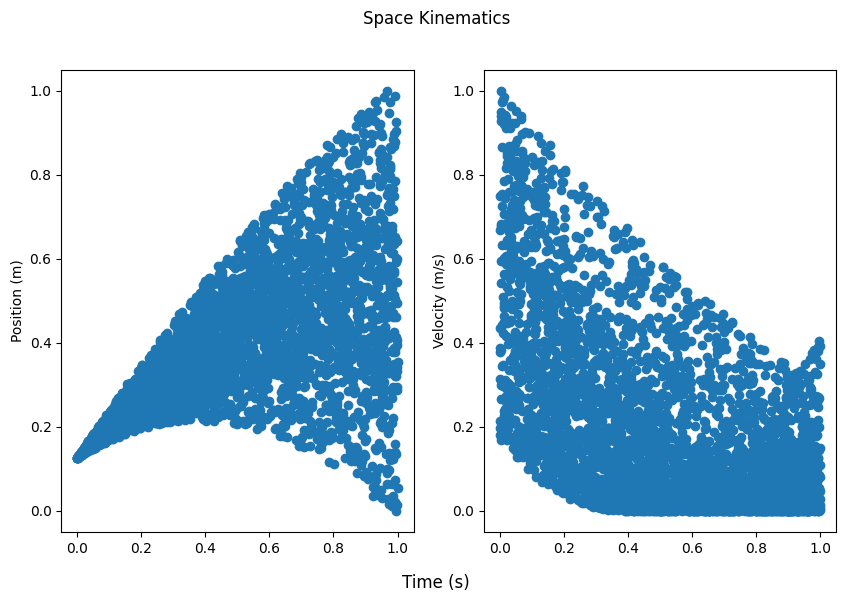

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(signal)

signal_norm = scaler.transform(signal)

print(signal_norm.shape)
fig, subplots = plt.subplots(1, 2, figsize=(10,6))

subplots[0].scatter(signal_norm[:,0], signal_norm[:,1])
subplots[0].set_ylabel("Position (m)")

subplots[1].scatter(signal_norm[:,0], signal_norm[:,2])
subplots[1].set_ylabel("Velocity (m/s)")

fig.suptitle("Space Kinematics")
fig.supxlabel("Time (s)")
plt.show()

# The distribution looks the same, but now everyhting is between 0 and 1 :]

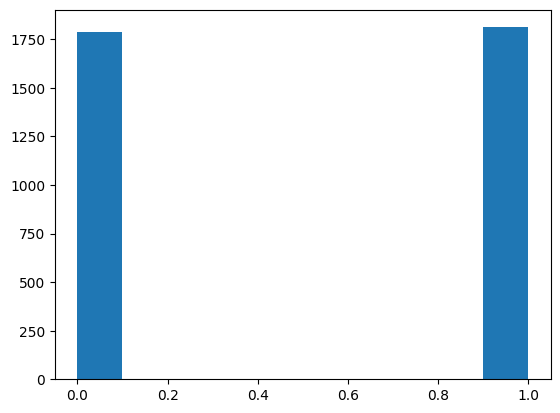

In [ ]:
plt.hist(source)
plt.show()

# Writing the model

Because our problem has 3 different indepedent variables, we need to make a model that accounts for that.

Like our linear model, we need to have adjustable coefficents ($m, b$) that change the prediction after reach step of gradient descent. Let's use the linear model as a basis, but just accounting for 3 different dimensions.

$f(\vec{x}) = c_1x_1 + c_2x_2 + c_3x_3$

We then can combine this multidimensional linear equation with our sigmoid function, like we did above.

$$g(\vec{x}) = \sigma(f(\vec{x})) = \sigma(c_1x_1 + c_2x_2 + c_3x_3) =  \frac{1}{1 + e^{-(c_1x_1 + c_2x_2 + c_3x_3)}}$$


In [ ]:
def logisitic_model(x, c:np.array):
    n_dimensions = x.shape[1]
    exponent = np.sum(np.array([x[:,i]*c[i] for i in range(n_dimensions)]), axis=0)
    return 1.0 / (1.0 + np.e**(-(exponent)))

## New loss function

While you certainly can use the mean squared error criterion from before, there is actually a better choice: it's called the _cross-entropy loss function_. It turns out that for logistic regression, the cross entropy loss is _convex_, meaning we are guaranteed to converge to the global minimum and find the absolute best fit of our model. The cross entropy loss is given by:

$$J(\hat{y}, y) = -y \ln \hat{y} - (1-y) \ln (1-\hat{y}),$$

and the total loss over the dataset:

$$L(g(\vec{x}), y) = \frac{1}{N} \sum_{i=1}^N J(g(x_i), y_i).$$

## ⚠️ Check your understanding/Discussion

How does this new loss behave with our logistic model? What does it produce at different outputs?

In [ ]:
# Apply this loss to a sigmoid output
def cross_entry_loss(y, y_hat):
    loss = -y*np.log2(y_hat) - (1-y)*np.log2(1-y_hat)
    return loss

In [ ]:
# Let's see what hapepns when you have different x/y_true combos
y_prediction = 0
assert cross_entry_loss(90, y_prediction) == 0
assert cross_entry_loss(7, y_prediction) == 1

<ipython-input-79-a3b7d6777e7e>:3: RuntimeWarning: divide by zero encountered in log2
  loss = -y*np.log2(y_hat) - (1-y)*np.log2(1-y_hat)


AssertionError: 

# Write the optimization loop
In order to optimize the model, we need to take the gradient of the loss criteron, $L(g(\vec{x}), y)$, that we defined above.

The deriative here is a little tricky, but we can calculate it with the chain rule. The proof here is beyond the scope of this notebook, but know that our deriative ends up being:

$$ \frac{\delta}{\delta c_i} = \frac{1}{N} \sum_{i=1}^N (x_i * (\sigma_c(x_i))-y_i)$$

([You can find a derivation on this stack post](https://math.stackexchange.com/a/3540617))

In [ ]:
def f_prime(x, y, c_i):
    # TODO Notate
    y_pred = logisitic_model(x, c_i)
    return np.array([1/x.shape[1]*np.sum(x[:,i]*(y_pred - y), axis=0) for i in range(len(c_i))])

def gradient_descent(x:np.array, y:np.array, c:np.array, f_prime:callable, gamma:float=0.01, N:int=100):
    loss_history = []
    for _ in range(N):
        y_pred = logisitic_model(x, c) # How do we get the prediction?

        # What is the loss we're optimizing?
        loss = cross_entry_loss(y, y_pred)
        loss_history.append(loss.mean())

        # Calculate the derivatives of the loss function at x and y, y_pred
        gradient = f_prime(x, y, c)
        c =  c - gamma * gradient # Because we are keeping track of the loss history, it's fine to overwrite the coefficents

    return c, loss_history


In [ ]:
c_init = np.array([0.5,0.5,0.5])
model_coeff, loss_history = gradient_descent(
    x=signal_norm, y=source, c=c_init, f_prime=f_prime
)

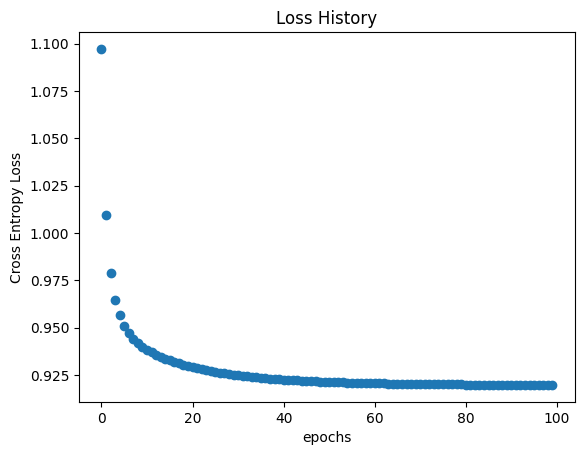

In [ ]:
# Plot the loss
epochs = range(len(loss_history)) # range(len(x)) is a shortcut to get a set integers from 0 to N, where N is the number of elements in x.
plt.scatter(epochs, loss_history)

# Like good scientists, we always give our plots labels
plt.xlabel("epochs")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss History")

plt.show()

In [ ]:
model_coeff

array([ 2.65299203, -3.77105973, -0.2660378 ])

In [ ]:
## Make some predictions
new_signal, new_source_true = space_signal(N_pings=20)
y_prediction = logisitic_model(new_signal, model_coeff)
y_prediction

array([3.83359600e-29, 9.45439350e-24, 9.34891143e-25, 1.12181079e-71,
       6.35213282e-13, 1.76215192e-29, 1.74515422e-60, 3.86490773e-23,
       5.80576595e-36, 2.74316387e-27, 7.45325197e-44, 3.91709082e-26,
       9.65651860e-14, 1.65376442e-38, 3.94679289e-16, 9.38617249e-01,
       3.36024484e-26, 3.36088184e-41, 1.11299208e-74, 4.80942433e-30])

Well, this doesn't look quite right. It is important that we remember that we made a pre-processing step - This isn't included in the `logistic_model` function, so we need to apply it to our new test set.

In [ ]:
new_signal_norm = scaler.transform(new_signal)
y_prediction = logisitic_model(new_signal_norm, model_coeff)
y_prediction # Much more reasonable values.

array([0.33834307, 0.34637869, 0.41339371, 0.44462285, 0.47936014,
       0.33309474, 0.26273189, 0.35635847, 0.3486303 , 0.50796979,
       0.53685463, 0.61394367, 0.49833158, 0.54351007, 0.43092937,
       0.88364322, 0.68046588, 0.36945621, 0.4046781 , 0.5832839 ])

In [ ]:
cross_entry_loss(new_source_true,y_prediction).mean() # Just higher than our training loss, not bad!

0.962096947426657

# Check your understanding - Dicussion

The y_prediction doesn't exactly match the loss we picked before, why do you think that is? Is there a way to show the way our `signal_norm` used in training differs from the `new_signal_norm` we used in testing?

# Out of Distribution data

Oh goodness! We just got another signal! Someone must have lost track of the astronauts on mission. This signal though, it looks....very different. You compared the timestamp on the message and the time you recieved it, and deterimed it had to be sent from over 5 AU away! It had to be sent from Jupiter, which is quite a feat for a pre-light travel civialization such as your own.

For giggles, instead of reporting this incredible scientific discovery, you put in your newly trained classification algorithm.


In [ ]:
def jupiter_kinemantics(time):
    gravity = 24.79
    position, velocity = kinematics(time, gravity)
    return np.array([time, position, velocity])

def jupiter_signal(N_pings=100):
    signal = np.array([0,0,0])
    for _ in range(N_pings):
        time = 5 * rng.random()
        new_signal = jupiter_kinemantics(time)

        signal = np.vstack([signal, new_signal])
    signal = signal[1:,]
    return signal

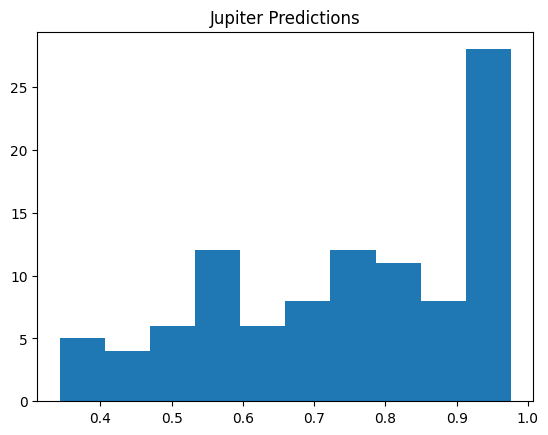

In [ ]:
signal = jupiter_signal()

# We scale it the same as we did before
scaled_signal = scaler.transform(signal)

#Predict the class?
y_prediction = logisitic_model(scaled_signal, model_coeff)

plt.title("Jupiter Predictions")
plt.hist(y_prediction)
plt.show()

Now this is strange, instead of clearly being one class or the other, it's a bizarre mix of both with no rhyme or reason!

This is because this data is what we call "Out of Distribution" - it is vastly different than the original data we trained our model to recongize.
It's an exaggerated effect of what we saw with the testing data. The input is different than what was given, so the model isn't ready to handle it. We could re-train the model including the new Jupiter signal and see more logical performance, but as the model is now, it is not designed.

In machine learning, specifying what inputs are in and out of distribution is very important. It can help in ensuring your model is accurate when used.